Aufgabe A:

In [1]:
import networkit
import networkit as nk

#G = nk.graphio.EdgeListReader("\t", 0).read("./MIT8.edgelist")
G = nk.readGraph("./graphs/MIT8.edgelist", nk.Format.EdgeListTabZero)

print(G)

NetworKit.Graph(n=6440, m=251252)


Anzahl der ZHKs:  18


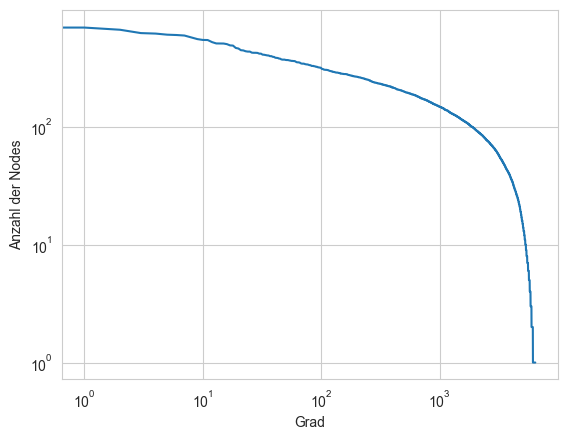

In [2]:
import networkit as nk
import matplotlib.pyplot as plt

cc = nk.components.ConnectedComponents(G)
cc.run()

print("Anzahl der ZHKs: ", cc.numberOfComponents())

lzhk = cc.extractLargestConnectedComponent(G)

dd = sorted(nk.centrality.DegreeCentrality(G).run().scores(), reverse=True)
plt.xscale("log")
plt.xlabel("Grad")
plt.yscale("log")
plt.ylabel("Anzahl der Nodes")
plt.loglog(dd)
plt.show()

Ist keine Powerlaw-Verteilung.

Aufgabe B:

In [3]:
import powerlaw

results = powerlaw.Fit(list(cc.getComponentSizes().values()))
print(results.power_law.alpha)

Calculating best minimal value for power law fit
2.879837460785231


Aufgabe C:

Warum sollten sie nicht die komplette Distanzmatrix des Graphen in unserer Cloud berechnen?
Die Cloud würde dies wahrscheinlich nicht schaffen.

In [ ]:
from networkit.distance import SPSP
import math

valuePairs = list(tuple())

sources = list()

for i in range(math.floor(lzhk.numberOfNodes()/25) + 1):
    sources.append(0 + (i * 25))

spsp = SPSP(lzhk, sources)
spsp.run()